In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,3,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,12.247694
1,1,2,20,3,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,12.109011
2,2,3,60,3,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,12.317167
3,3,4,70,3,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,11.849398
4,4,5,60,3,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,12.429216


In [4]:
df = df.drop(['Unnamed: 0','Id'], axis=1)
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,12.247694
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,12.109011
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,12.317167
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,11.849398
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,12.429216


In [5]:
train_data = df.values
Y = train_data[:,-1].reshape(train_data.shape[0],1)
X = train_data[:,:-1]
print(X.shape, Y.shape)

(1200, 69) (1200, 1)


In [6]:
X = np.vstack((np.ones((X.shape[0],)), X.T)).T

In [7]:
def costFunction(yPred, y):
    return np.sum(np.square(yPred - y)) / (2 * y.size)

In [23]:
def model(X, Y, learningRate, iterations):
    theta = np.zeros((X.shape[1], 1))
    costList = []
    print(X.shape, Y.shape, theta.shape)
    for i in range(iterations):

        y_pred = np.dot(X, theta)
        
        cost = costFunction(y_pred, Y)
        costList.append(cost)

        theta = theta - (learningRate * np.dot(X.T, (y_pred - Y))/Y.size)
    return theta, costList

# def model(X, Y, learning_rate, iteration):
#     m = Y.size
#     theta = np.zeros((X.shape[1], 1))
#     cost_list = []
#     for i in range(iteration):
#         y_pred = np.dot(X, theta)
#         cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
#         d_theta = (1/m)*np.dot(X.T, y_pred - Y)
#         theta = theta - learning_rate*d_theta
#         cost_list.append(cost)
#         # to print the cost for 10 times
#         if(i%(iteration/10) == 0):
#             print("Cost is :", cost)
#     return theta, cost_list

In [24]:
theta, costList = model(X, Y, 0.0000000005, 10000)

(1200, 70) (1200, 1) (70, 1)


c:\Users\Jass\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Jass\AppData\Local\Temp\ipykernel_9020\3387794465.py:2: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(yPred - y)) / (2 * y.size)


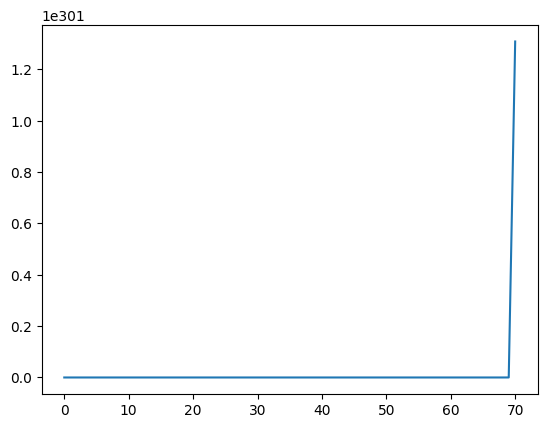

In [25]:
rng = np.arange(0, 10000)
plt.plot(rng, costList)
plt.show()